## Homework 3

* Generate dataset using `make_classification` function in the sklearn.datasets class. Generate 10000 samples with 8 features (X) with one label (y). Also, use following parameters    
    * `n_informative` = 5
    *  `class_sep` = 2
    * `random_state` = 42
* Explore and analyse raw data.
* Do preprocessing for classification.
* Split your dataset into train and test test (0.7 for train and 0.3 for test).
* Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)
* Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_classification

In [2]:
# Generate dataset using make_classification function in the sklearn. 
# Convert it into pandas dataframe.
ndarray = make_classification(n_informative = 5, class_sep = 2, random_state = 42)
ndarray

(array([[ 0.07420621,  0.26966936,  0.72254008, ...,  0.70771554,
          0.50550181,  0.45992903],
        [-1.01441888,  0.42423426,  0.61114365, ...,  1.47907897,
         -0.25658793,  2.29088392],
        [-2.24909573, -1.15674423, -1.82406987, ...,  1.44538469,
         -0.45424428,  2.32861901],
        ...,
        [-0.07514417,  0.38397155,  0.4996371 , ...,  0.40119222,
          0.13921541, -1.29637592],
        [ 0.40162551, -0.1567304 ,  0.23519983, ..., -2.23442644,
         -1.65049121, -1.15556805],
        [ 0.4709785 , -0.26576959,  0.48869195, ...,  0.52806837,
         -0.94385071, -1.81930793]]),
 array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
        1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1]))

In [3]:
df = pd.DataFrame(ndarray[0])
df2 = pd.DataFrame(ndarray[1])
df['target'] = df2
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.074206,0.269669,0.722540,0.607514,1.222833,0.950503,-0.028925,1.736467,0.433227,-0.229403,...,0.189076,2.308912,-0.342976,-0.669121,-0.230056,1.039729,0.707716,0.505502,0.459929,1
1,-1.014419,0.424234,0.611144,0.107042,-0.620053,-0.965498,-2.402754,-4.518210,0.357931,0.782870,...,0.693300,-2.047075,0.030162,1.749581,0.143339,0.765517,1.479079,-0.256588,2.290884,1
2,-2.249096,-1.156744,-1.824070,0.725151,1.363878,0.059142,-0.019935,-0.016913,0.652371,-0.682992,...,0.942216,3.650452,1.126117,1.533978,-1.532796,3.423773,1.445385,-0.454244,2.328619,1
3,0.641931,-0.352013,2.105202,1.221801,-2.856569,2.687534,1.474056,-1.795152,-0.818974,0.653283,...,1.295619,-1.472407,-1.810032,0.265156,0.885803,1.254881,0.230010,-0.687934,-1.113054,1
4,-0.940414,-0.937356,-1.241501,1.315767,-2.247805,0.252756,-0.657233,3.088315,-4.380921,0.234652,...,2.486723,1.135038,1.646397,0.813864,-1.669779,2.825210,1.764687,-1.007089,-0.816305,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.992689,-2.029674,-1.518449,-0.103023,-2.702745,-0.839881,-0.662714,-2.217122,-0.851172,0.545817,...,1.523977,-2.116780,-0.565285,-0.498362,0.763591,1.036527,1.257060,-0.410709,1.243853,1
96,1.157815,0.879593,-1.252589,0.281180,-1.239209,-0.436053,-0.781713,2.104325,0.718137,-0.451410,...,-2.500479,-0.469783,0.282544,0.680265,0.607131,-3.077446,1.311159,-0.707853,-0.502462,0
97,-0.075144,0.383972,0.499637,1.149420,3.052837,0.063688,1.206153,3.934273,-6.260949,-0.578963,...,6.578709,-0.131236,0.471961,1.397415,-0.283942,3.776028,0.401192,0.139215,-1.296376,1
98,0.401626,-0.156730,0.235200,0.319223,1.642424,0.323800,-0.050423,3.517948,-0.619722,-0.685610,...,-0.504173,1.180375,-0.291490,0.777016,1.062402,-1.104500,-2.234426,-1.650491,-1.155568,1


In [4]:
# Check duplicate values and missing data.
df.drop_duplicates()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.074206,0.269669,0.722540,0.607514,1.222833,0.950503,-0.028925,1.736467,0.433227,-0.229403,...,0.189076,2.308912,-0.342976,-0.669121,-0.230056,1.039729,0.707716,0.505502,0.459929,1
1,-1.014419,0.424234,0.611144,0.107042,-0.620053,-0.965498,-2.402754,-4.518210,0.357931,0.782870,...,0.693300,-2.047075,0.030162,1.749581,0.143339,0.765517,1.479079,-0.256588,2.290884,1
2,-2.249096,-1.156744,-1.824070,0.725151,1.363878,0.059142,-0.019935,-0.016913,0.652371,-0.682992,...,0.942216,3.650452,1.126117,1.533978,-1.532796,3.423773,1.445385,-0.454244,2.328619,1
3,0.641931,-0.352013,2.105202,1.221801,-2.856569,2.687534,1.474056,-1.795152,-0.818974,0.653283,...,1.295619,-1.472407,-1.810032,0.265156,0.885803,1.254881,0.230010,-0.687934,-1.113054,1
4,-0.940414,-0.937356,-1.241501,1.315767,-2.247805,0.252756,-0.657233,3.088315,-4.380921,0.234652,...,2.486723,1.135038,1.646397,0.813864,-1.669779,2.825210,1.764687,-1.007089,-0.816305,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.992689,-2.029674,-1.518449,-0.103023,-2.702745,-0.839881,-0.662714,-2.217122,-0.851172,0.545817,...,1.523977,-2.116780,-0.565285,-0.498362,0.763591,1.036527,1.257060,-0.410709,1.243853,1
96,1.157815,0.879593,-1.252589,0.281180,-1.239209,-0.436053,-0.781713,2.104325,0.718137,-0.451410,...,-2.500479,-0.469783,0.282544,0.680265,0.607131,-3.077446,1.311159,-0.707853,-0.502462,0
97,-0.075144,0.383972,0.499637,1.149420,3.052837,0.063688,1.206153,3.934273,-6.260949,-0.578963,...,6.578709,-0.131236,0.471961,1.397415,-0.283942,3.776028,0.401192,0.139215,-1.296376,1
98,0.401626,-0.156730,0.235200,0.319223,1.642424,0.323800,-0.050423,3.517948,-0.619722,-0.685610,...,-0.504173,1.180375,-0.291490,0.777016,1.062402,-1.104500,-2.234426,-1.650491,-1.155568,1


In [5]:
df.isnull().sum()
df.dropna()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.074206,0.269669,0.722540,0.607514,1.222833,0.950503,-0.028925,1.736467,0.433227,-0.229403,...,0.189076,2.308912,-0.342976,-0.669121,-0.230056,1.039729,0.707716,0.505502,0.459929,1
1,-1.014419,0.424234,0.611144,0.107042,-0.620053,-0.965498,-2.402754,-4.518210,0.357931,0.782870,...,0.693300,-2.047075,0.030162,1.749581,0.143339,0.765517,1.479079,-0.256588,2.290884,1
2,-2.249096,-1.156744,-1.824070,0.725151,1.363878,0.059142,-0.019935,-0.016913,0.652371,-0.682992,...,0.942216,3.650452,1.126117,1.533978,-1.532796,3.423773,1.445385,-0.454244,2.328619,1
3,0.641931,-0.352013,2.105202,1.221801,-2.856569,2.687534,1.474056,-1.795152,-0.818974,0.653283,...,1.295619,-1.472407,-1.810032,0.265156,0.885803,1.254881,0.230010,-0.687934,-1.113054,1
4,-0.940414,-0.937356,-1.241501,1.315767,-2.247805,0.252756,-0.657233,3.088315,-4.380921,0.234652,...,2.486723,1.135038,1.646397,0.813864,-1.669779,2.825210,1.764687,-1.007089,-0.816305,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.992689,-2.029674,-1.518449,-0.103023,-2.702745,-0.839881,-0.662714,-2.217122,-0.851172,0.545817,...,1.523977,-2.116780,-0.565285,-0.498362,0.763591,1.036527,1.257060,-0.410709,1.243853,1
96,1.157815,0.879593,-1.252589,0.281180,-1.239209,-0.436053,-0.781713,2.104325,0.718137,-0.451410,...,-2.500479,-0.469783,0.282544,0.680265,0.607131,-3.077446,1.311159,-0.707853,-0.502462,0
97,-0.075144,0.383972,0.499637,1.149420,3.052837,0.063688,1.206153,3.934273,-6.260949,-0.578963,...,6.578709,-0.131236,0.471961,1.397415,-0.283942,3.776028,0.401192,0.139215,-1.296376,1
98,0.401626,-0.156730,0.235200,0.319223,1.642424,0.323800,-0.050423,3.517948,-0.619722,-0.685610,...,-0.504173,1.180375,-0.291490,0.777016,1.062402,-1.104500,-2.234426,-1.650491,-1.155568,1


In [6]:
df.shape

(100, 21)

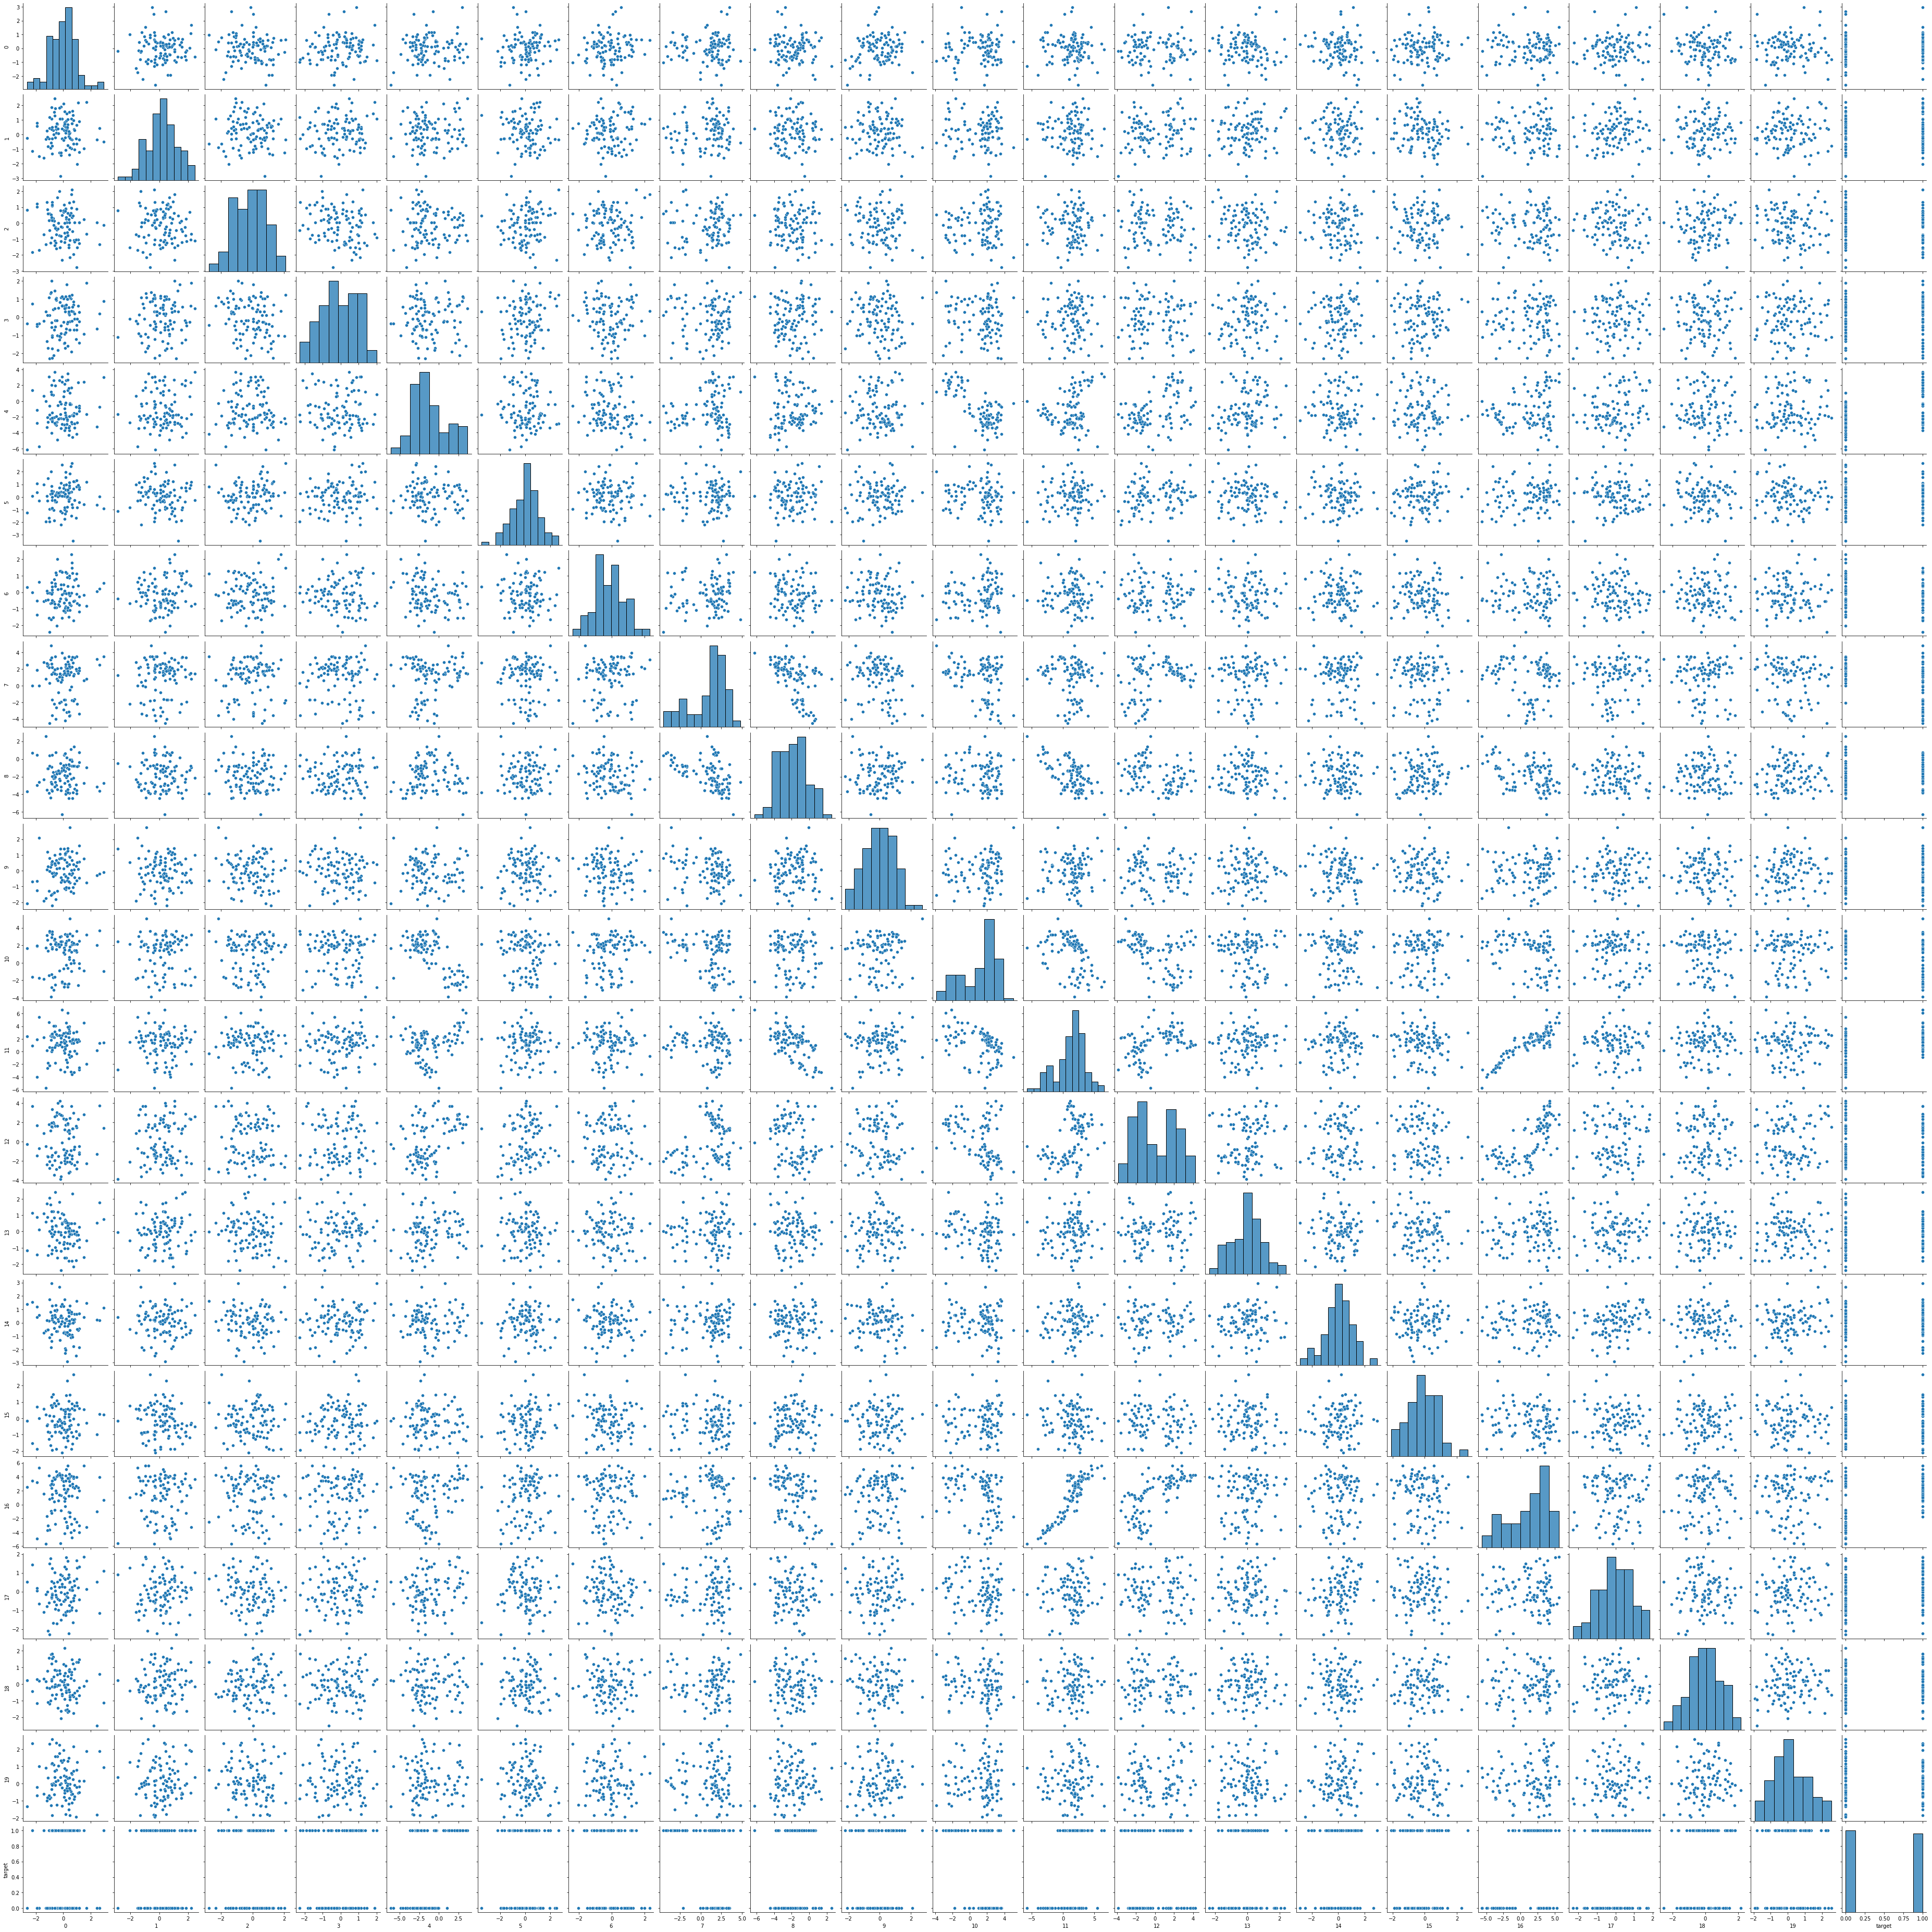

In [7]:
# Visualize data for each feature (pairplot,distplot).
sns.pairplot(data=df);

C:\Users\Serap\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


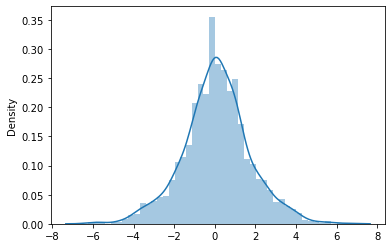

In [8]:
sns.distplot(df);

In [9]:
# Draw correlation matrix.
df.corr()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,1.000000,0.041307,-0.116651,0.112741,0.095092,0.091433,0.125178,0.020642,-0.030058,0.176880,...,-0.040182,0.009694,-0.091957,-0.126518,0.101152,-0.036659,0.118618,-0.142000,-0.026011,0.001635
1,0.041307,1.000000,-0.049298,0.123173,0.083806,-0.061731,0.107535,0.106420,-0.041598,-0.081205,...,-0.013144,0.132184,0.109622,-0.001352,-0.154234,0.029883,0.059673,0.057708,0.036340,-0.004295
2,-0.116651,-0.049298,1.000000,-0.221406,-0.037937,0.108892,0.048748,0.057964,-0.062625,-0.121325,...,0.000044,-0.060098,-0.123824,-0.026881,-0.072008,-0.042320,-0.162746,0.061295,-0.104182,-0.054178
3,0.112741,0.123173,-0.221406,1.000000,0.014416,0.151327,-0.057808,-0.016764,0.014587,-0.102088,...,0.055863,0.004898,0.055737,0.121770,0.070386,0.037723,0.101307,0.002686,0.038039,0.132859
4,0.095092,0.083806,-0.037937,0.014416,1.000000,-0.037618,-0.208792,0.157092,0.044414,-0.002205,...,0.236103,0.442224,0.177636,-0.038381,-0.080411,0.197088,0.170388,0.013999,0.040130,0.535819
5,0.091433,-0.061731,0.108892,0.151327,-0.037618,1.000000,-0.042932,-0.039391,0.062921,0.058467,...,0.056635,0.147551,-0.085764,-0.051392,0.155522,0.135059,-0.026322,-0.021856,-0.088869,0.041631
6,0.125178,0.107535,0.048748,-0.057808,-0.208792,-0.042932,1.000000,0.123449,-0.171100,-0.101715,...,-0.012832,-0.026398,-0.040516,-0.066238,-0.140959,-0.012766,-0.116201,-0.018046,-0.039294,-0.159713
7,0.020642,0.106420,0.057964,-0.016764,0.157092,-0.039391,0.123449,1.000000,-0.537458,-0.229485,...,-0.086960,0.340373,0.051518,0.019529,-0.073452,-0.128862,0.020353,-0.019806,-0.130055,-0.492888
8,-0.030058,-0.041598,-0.062625,0.014587,0.044414,0.062921,-0.171100,-0.537458,1.000000,0.069871,...,-0.602222,-0.256905,-0.049117,-0.059583,0.100884,-0.447280,-0.042767,0.001479,0.096073,0.214474
9,0.176880,-0.081205,-0.121325,-0.102088,-0.002205,0.058467,-0.101715,-0.229485,0.069871,1.000000,...,0.053264,-0.063160,0.012982,-0.098635,-0.044046,0.057985,0.083167,-0.055120,0.102042,0.052792


In [10]:
# Handle outliers (you can use IsolationForest, Z-score, IQR)
from scipy import stats
z = np.abs(stats.zscore(df))
z

array([[0.09274184, 0.0808502 , 0.85089106, ..., 0.56690366, 0.29542841,
        1.02020406],
       [1.05998143, 0.23315178, 0.7416155 , ..., 0.23384699, 2.02540602,
        1.02020406],
       [2.36735599, 1.3246762 , 1.64723428, ..., 0.44153047, 2.06106001,
        1.02020406],
       ...,
       [0.06540228, 0.19347865, 0.6322319 , ..., 0.1820355 , 1.3640162 ,
        1.02020406],
       [0.43943957, 0.33930572, 0.37282922, ..., 1.69846317, 1.23097389,
        1.02020406],
       [0.51287606, 0.44674823, 0.62149514, ..., 0.9559747 , 1.85810847,
        1.02020406]])

In [11]:
outliers = list(set(np.where(z > 3)[0]))

len(outliers)

5

In [12]:
df = df.drop(outliers,axis = 0).reset_index(drop = False)
display(df)

,index,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,target
0,0,0.074206,0.269669,0.722540,0.607514,1.222833,0.950503,-0.028925,1.736467,0.433227,...,0.189076,2.308912,-0.342976,-0.669121,-0.230056,1.039729,0.707716,0.505502,0.459929,1
1,1,-1.014419,0.424234,0.611144,0.107042,-0.620053,-0.965498,-2.402754,-4.518210,0.357931,...,0.693300,-2.047075,0.030162,1.749581,0.143339,0.765517,1.479079,-0.256588,2.290884,1
2,2,-2.249096,-1.156744,-1.824070,0.725151,1.363878,0.059142,-0.019935,-0.016913,0.652371,...,0.942216,3.650452,1.126117,1.533978,-1.532796,3.423773,1.445385,-0.454244,2.328619,1
3,3,0.641931,-0.352013,2.105202,1.221801,-2.856569,2.687534,1.474056,-1.795152,-0.818974,...,1.295619,-1.472407,-1.810032,0.265156,0.885803,1.254881,0.230010,-0.687934,-1.113054,1
4,4,-0.940414,-0.937356,-1.241501,1.315767,-2.247805,0.252756,-0.657233,3.088315,-4.380921,...,2.486723,1.135038,1.646397,0.813864,-1.669779,2.825210,1.764687,-1.007089,-0.816305,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,95,0.992689,-2.029674,-1.518449,-0.103023,-2.702745,-0.839881,-0.662714,-2.217122,-0.851172,...,1.523977,-2.116780,-0.565285,-0.498362,0.763591,1.036527,1.257060,-0.410709,1.243853,1
91,96,1.157815,0.879593,-1.252589,0.281180,-1.239209,-0.436053,-0.781713,2.104325,0.718137,...,-2.500479,-0.469783,0.282544,0.680265,0.607131,-3.077446,1.311159,-0.707853,-0.502462,0
92,97,-0.075144,0.383972,0.499637,1.149420,3.052837,0.063688,1.206153,3.934273,-6.260949,...,6.578709,-0.131236,0.471961,1.397415,-0.283942,3.776028,0.401192,0.139215,-1.296376,1
93,98,0.401626,-0.156730,0.235200,0.319223,1.642424,0.323800,-0.050423,3.517948,-0.619722,...,-0.504173,1.180375,-0.291490,0.777016,1.062402,-1.104500,-2.234426,-1.650491,-1.155568,1


In [13]:
# Split dataset into train and test set
from sklearn.model_selection import train_test_split
X = df.drop(['target'], axis = 1)
y = df['target']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [14]:
# Import Decision Tree, define different hyperparamters and tune the algorithm.
from sklearn.tree import DecisionTreeClassifier
D = DecisionTreeClassifier(max_depth=4, random_state=42)
D.fit(X_train, y_train)
pred = D.predict(X_test)

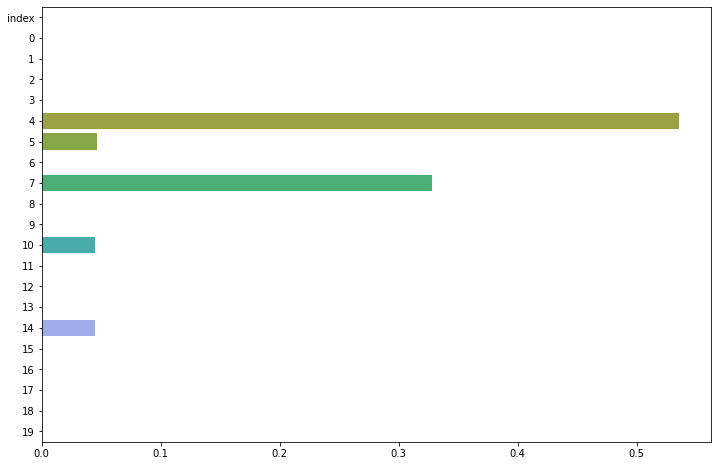

In [15]:
# Visualize feature importances.
plt.figure(figsize=(12, 8))
importance = D.feature_importances_
sns.barplot(x=importance, y=X_train.columns);

In [16]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [17]:
accuracy_score(y_test, pred)

1.0

In [18]:
precision_score(y_test, pred)

1.0

In [19]:
recall_score(y_test, pred)

1.0

In [20]:
f1_score(y_test, pred)

1.0

In [21]:
confusion_matrix(y_test, pred)

array([[3, 0],
       [0, 7]], dtype=int64)

In [22]:
# Import XGBoostClassifier, define different hyperparamters and tune the algorithm.
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)
pred = xgbc.predict(X_test)

C:\Users\Serap\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:25:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


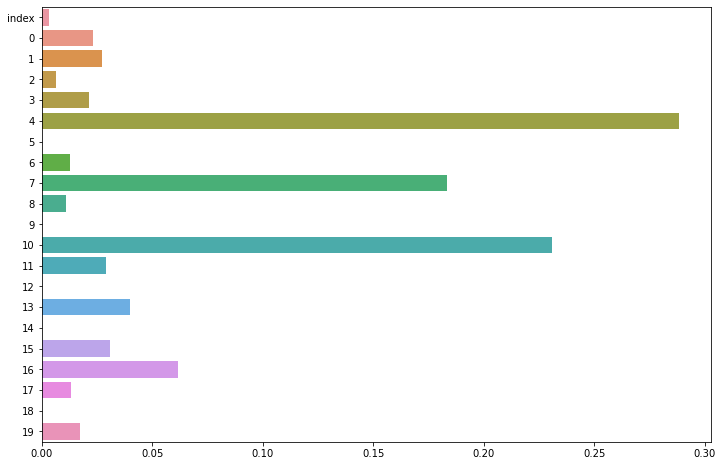

In [23]:
# Visualize feature importances.
plt.figure(figsize=(12, 8))
importance = xgbc.feature_importances_
sns.barplot(x=importance, y=X_train.columns);

In [24]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.
accuracy_score(y_test, pred)

1.0

In [25]:
precision_score(y_test, pred)

1.0

In [26]:
recall_score(y_test, pred)

1.0

In [27]:
f1_score(y_test, pred)

1.0

In [28]:
confusion_matrix(y_test, pred)

array([[3, 0],
       [0, 7]], dtype=int64)

In [29]:
# Evaluate your result and select best performing algorithm for our case.

Best performing algorithm is XGBClassifier.